# Energetics of the Einstein Rosen Spacetime by Herrera et al
##  Geoff Cope
##  Univeristy of Utah
##  January 2, 2022

https://arxiv.org/abs/gr-qc/0606052

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
t,r,phi,z,dt,dr,dphi,dz = symbols( 't r phi z dt dr dphi dz' ) 

In [4]:
psi = Function('psi')(r,t)
psi

In [5]:
gamma = Function('gamma')(r,t)
gamma

In [6]:
variables = Matrix( [t,r,phi,z] )
variables

⎡t⎤
⎢ ⎥
⎢r⎥
⎢ ⎥
⎢φ⎥
⎢ ⎥
⎣z⎦

In [7]:
differentials = Matrix( [dt,dr,dphi,dz] ) 
differentials

⎡ dt ⎤
⎢    ⎥
⎢ dr ⎥
⎢    ⎥
⎢dphi⎥
⎢    ⎥
⎣ dz ⎦

In [8]:
lineElement = expand( - exp(2*(gamma-psi)) * ( dt**2- dr**2 ) + exp(2*psi)*dz**2 + r**2 * exp(-2*psi) * dphi**2 ) 
lineElement

In [9]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡  2⋅γ(r, t)  -2⋅ψ(r, t)                                                    ⎤
⎢-ℯ         ⋅ℯ                      0                   0             0     ⎥
⎢                                                                           ⎥
⎢                          2⋅γ(r, t)  -2⋅ψ(r, t)                            ⎥
⎢           0             ℯ         ⋅ℯ                  0             0     ⎥
⎢                                                                           ⎥
⎢                                                  2  -2⋅ψ(r, t)            ⎥
⎢           0                       0             r ⋅ℯ                0     ⎥
⎢                                                                           ⎥
⎢                                                                  2⋅ψ(r, t)⎥
⎣           0                       0                   0         ℯ         ⎦

In [10]:
import sympy

In [11]:
m = sympy.Array(g)
m

⎡  2⋅γ(r, t)  -2⋅ψ(r, t)                                                    ⎤
⎢-ℯ         ⋅ℯ                      0                   0             0     ⎥
⎢                                                                           ⎥
⎢                          2⋅γ(r, t)  -2⋅ψ(r, t)                            ⎥
⎢           0             ℯ         ⋅ℯ                  0             0     ⎥
⎢                                                                           ⎥
⎢                                                  2  -2⋅ψ(r, t)            ⎥
⎢           0                       0             r ⋅ℯ                0     ⎥
⎢                                                                           ⎥
⎢                                                                  2⋅ψ(r, t)⎥
⎣           0                       0                   0         ℯ         ⎦

In [12]:
from einsteinpy.symbolic import *

In [13]:
syms = sympy.symbols("t r phi z")
t,r,phi,z = syms

In [14]:
metric = MetricTensor(m,syms)

In [15]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡⎡∂             ∂            ∂             ∂                                                
⎢⎢──(γ(r, t)) - ──(ψ(r, t))  ──(γ(r, t)) - ──(ψ(r, t))               0                      
⎢⎢∂t            ∂t           ∂r            ∂r                                               
⎢⎢                                                                                          
⎢⎢∂             ∂            ∂             ∂                                                
⎢⎢──(γ(r, t)) - ──(ψ(r, t))  ──(γ(r, t)) - ──(ψ(r, t))               0                      
⎢⎢∂r            ∂r           ∂t            ∂t                                               
⎢⎢                                                                                          
⎢⎢                                                        2  -2⋅γ(r, t) ∂                   
⎢⎢            0                          0              -r ⋅ℯ          ⋅──(ψ(r, t))         
⎢⎢                                                                    

In [16]:
Ric = RicciTensor.from_metric(metric)
simplify(Ric.tensor())

⎡    ⎛    2              2              2                           2     2         ⎞       
⎢    ⎜   ∂              ∂              ∂               ⎛∂          ⎞     ∂          ⎟   ∂   
⎢- r⋅⎜- ───(γ(r, t)) + ───(γ(r, t)) + ───(ψ(r, t)) + 2⋅⎜──(ψ(r, t))⎟  - ───(ψ(r, t))⎟ + ──(γ
⎢    ⎜    2              2              2              ⎝∂t         ⎠      2         ⎟   ∂r  
⎢    ⎝  ∂r             ∂t             ∂r                                ∂t          ⎠       
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                       r                                   
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                 ∂   

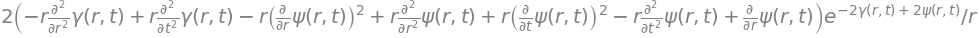

In [17]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [18]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡  ⎛  2              2              2                           2     2         ⎞           
⎢  ⎜ ∂              ∂              ∂               ⎛∂          ⎞     ∂          ⎟   ∂       
⎢r⋅⎜───(γ(r, t)) - ───(γ(r, t)) - ───(ψ(r, t)) - 2⋅⎜──(ψ(r, t))⎟  + ───(ψ(r, t))⎟ + ──(γ(r, 
⎢  ⎜  2              2              2              ⎝∂t         ⎠      2         ⎟   ∂r      
⎢  ⎝∂r             ∂t             ∂r                                ∂t          ⎠           
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                     r                                     
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [19]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [20]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [21]:
einsteinSimplifed = simplify(einst.tensor()) 
einsteinSimplifed

⎡                                        ∂                                               ∂  
⎢               2                2   1.0⋅──(γ(r, t))                                     ──(
⎢  ⎛∂          ⎞    ⎛∂          ⎞        ∂r                    ∂           ∂             ∂t 
⎢- ⎜──(ψ(r, t))⎟  - ⎜──(ψ(r, t))⎟  + ───────────────       - 2⋅──(ψ(r, t))⋅──(ψ(r, t)) + ───
⎢  ⎝∂r         ⎠    ⎝∂t         ⎠           r                  ∂r          ∂t               
⎢                                                                                           
⎢                                   ∂                                                       
⎢                                   ──(γ(r, t))                      2                2   1.
⎢         ∂           ∂             ∂t                  ⎛∂          ⎞    ⎛∂          ⎞      
⎢     - 2⋅──(ψ(r, t))⋅──(ψ(r, t)) + ───────────       - ⎜──(ψ(r, t))⎟  - ⎜──(ψ(r, t))⎟  + ──
⎢         ∂r          ∂t                 r              ⎝∂r         ⎠ 

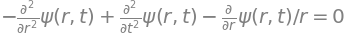

In [28]:
equation2 = Eq(expand((-1/r)*simplify(Ric.tensor())[2,2].args[1] ) ,0)
equation2

In [23]:
equation3 = Eq(diff(gamma,t) , solve( einsteinSimplifed[1,0] , diff(gamma,t) )[0] ) 
equation3

In [24]:
equation4 = Eq(diff(gamma,r) , solve( einsteinSimplifed[1,1] , diff(gamma,r) )[0] ) 
equation4

In [29]:
vacuumFieldEquations = Matrix([equation2,equation3,equation4])
vacuumFieldEquations

⎡                                 ∂               ⎤
⎢     2              2            ──(ψ(r, t))     ⎥
⎢    ∂              ∂             ∂r              ⎥
⎢ - ───(ψ(r, t)) + ───(ψ(r, t)) - ─────────── = 0 ⎥
⎢     2              2                 r          ⎥
⎢   ∂r             ∂t                             ⎥
⎢                                                 ⎥
⎢    ∂                 ∂           ∂              ⎥
⎢    ──(γ(r, t)) = 2⋅r⋅──(ψ(r, t))⋅──(ψ(r, t))    ⎥
⎢    ∂t                ∂r          ∂t             ⎥
⎢                                                 ⎥
⎢                ⎛             2                2⎞⎥
⎢∂               ⎜⎛∂          ⎞    ⎛∂          ⎞ ⎟⎥
⎢──(γ(r, t)) = r⋅⎜⎜──(ψ(r, t))⎟  + ⎜──(ψ(r, t))⎟ ⎟⎥
⎣∂r              ⎝⎝∂r         ⎠    ⎝∂t         ⎠ ⎠⎦

In [26]:
from sympy import *

In [32]:
X, Y = map(Function, 'XY')

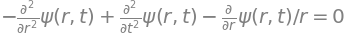

In [30]:
eq = vacuumFieldEquations[0]
eq

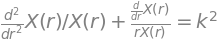

In [33]:
xODE = Eq(pde_separate( eq, psi, [X(r),Y(t)])[0] , k**2 ) 
xODE

In [34]:
xSolution = dsolve( xODE , X(r))
xSolution 

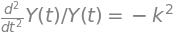

In [35]:
yODE = Eq( pde_separate( eq, psi, [X(r),Y(t)])[1] , - k**2 ) 
yODE

In [36]:
ySolution = dsolve( yODE , Y(t))
ySolution 